In [31]:
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime

In [32]:
df = pd.read_csv (r'C:/Users/44789/OneDrive/Desktop/Py test_MS/Yield_data.csv')

In [33]:
df.index.name = 'Num'
df = df.rename(columns={"Unnamed: 0": "Dates"})
df = df[["1Y", "2Y", "5Y", "7Y", "10Y", "12Y", "15Y", "20Y", "25Y", "30Y", "40Y", "50Y"]]

In [34]:
corr_df = df.corr(method='pearson')
#corr_df.head().reset_index()
corr_df

,1Y,2Y,5Y,7Y,10Y,12Y,15Y,20Y,25Y,30Y,40Y,50Y
1Y,1.000000,0.958053,0.898100,0.839014,0.799619,0.801264,0.802038,0.808897,0.813024,0.802626,0.783987,0.771083
2Y,0.958053,1.000000,0.972668,0.934220,0.899872,0.893567,0.884787,0.869165,0.852275,0.836315,0.812534,0.796386
5Y,0.898100,0.972668,1.000000,0.989577,0.972225,0.966956,0.956874,0.937989,0.915973,0.899871,0.876792,0.860956
7Y,0.839014,0.934220,0.989577,1.000000,0.995122,0.991276,0.983295,0.963838,0.940078,0.925931,0.906201,0.892407
10Y,0.799619,0.899872,0.972225,0.995122,1.000000,0.998816,0.993491,0.976948,0.954768,0.942644,0.925819,0.913800
12Y,0.801264,0.893567,0.966956,0.991276,0.998816,1.000000,0.997517,0.985450,0.966950,0.956391,0.941353,0.930420
15Y,0.802038,0.884787,0.956874,0.983295,0.993491,0.997517,1.000000,0.994125,0.980374,0.972329,0.960371,0.951328
20Y,0.808897,0.869165,0.937989,0.963838,0.976948,0.985450,0.994125,1.000000,0.995703,0.991342,0.983487,0.976954
25Y,0.813024,0.852275,0.915973,0.940078,0.954768,0.966950,0.980374,0.995703,1.000000,0.998996,0.994839,0.990589
30Y,0.802626,0.836315,0.899871,0.925931,0.942644,0.956391,0.972329,0.991342,0.998996,1.000000,0.998365,0.995684


In [35]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

In [36]:
df = pd.read_csv (r'C:/Users/44789/OneDrive/Desktop/Py test_MS/Yield_data.csv')
df.index.name = 'Num'
df = df.rename(columns={"Unnamed: 0": "Dates"})
df = df[["1Y", "2Y", "5Y", "7Y", "10Y", "12Y", "15Y", "20Y", "25Y", "30Y", "40Y", "50Y"]]

In [37]:
x = df.values #convert the data into a numpy array
x = scale(x);x

array([[0.70887819, 0.3422232 , 0.33756613, ..., 0.82332615, 0.8495841 ,
        0.86421176],
       [0.78744199, 0.41851934, 0.39527528, ..., 0.86408888, 0.8869591 ,
        0.89927204],
       [0.82401073, 0.45549853, 0.42850177, ..., 0.93768064, 0.96779984,
        0.98469668],
       ...,
       [3.12996454, 3.17750684, 3.15504082, ..., 3.63978409, 3.64911008,
        3.64955596],
       [3.07216234, 3.12841377, 3.11766103, ..., 3.48740264, 3.48299896,
        3.4753676 ],
       [3.07428569, 3.13075154, 3.11831681, ..., 3.48740264, 3.48327582,
        3.4753676 ]])

In [38]:
covar_matrix = PCA(n_components = 3) #we have 3 features

In [39]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([93.3, 97.9, 99.9])

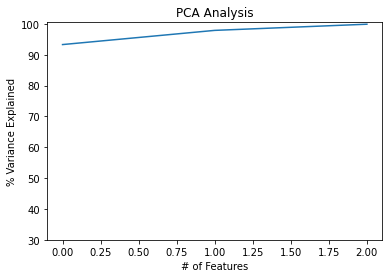

In [40]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [41]:
#The first principal component affects approximately equally the original variables and can
#therefore be interpreted as the parallel movement of the term structure


#The second principal component affects in a similar magnitude but with opposite signs the
#opposite end of the maturity spectrum, and can be interpreted as affecting the slope of the t.s.


#The third principal component affects in the same way the extremes of the curve and with
#an opposite sign the middle. Then the interpretation of this component as affecting the curvature.